# Importing Data

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
#Genreic imports
import pandas as pd
import scipy as scp
import numpy as np

In [3]:
#Plotting import
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Read data #Set location of the data files in your drive
#Different options: 100tbt.csv , 100pbp_r.csv , 100pbp_nr
dataframe = pd.read_csv('../results/allpbp_r.csv')

In [5]:
dataframe = dataframe[:300]

In [6]:
dataframe.head(3)

,Unnamed: 0,Title,Text,ARI,Gunning Fog Index,Flesch Reading Ease,Flesch Grade Level
0,0,Sir William Schwenck Gilbert___Bab Ballads and...,The Yarn of the Nancy BellThe Bishop and the B...,8.655142,11.249529,74.830049,8.341957
1,1,William Dean Howells___The Editor's Relations ...,\nLITERATURE AND LIFE--The Young ContributorOn...,15.819556,18.159257,51.332034,14.564621
2,2,George Alfred Henty___Bonnie Prince Charlie.txt,\nBonnie Prince Charlie\nA Tale of Fontenoy an...,9.586832,12.102394,70.838877,9.157410


In [7]:
print(len(dataframe))

300


In [8]:
#Display word distribution
# sns.set_style('darkgrid')
# plt.figure(figsize=(5,5))
# sns.distplot(dataframe['Word'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flesch Reading Ease', ylabel='Density'>

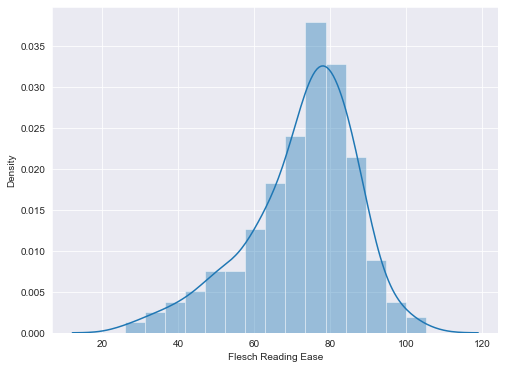

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.distplot(dataframe['Flesch Reading Ease'])

In [27]:
#Deleting non-sense data (Flesch Reading Ease under 10 and above 100)
dataframe = dataframe[dataframe['Flesch Reading Ease'] > 10]
dataframe = dataframe[dataframe['Flesch Reading Ease'] < 100]

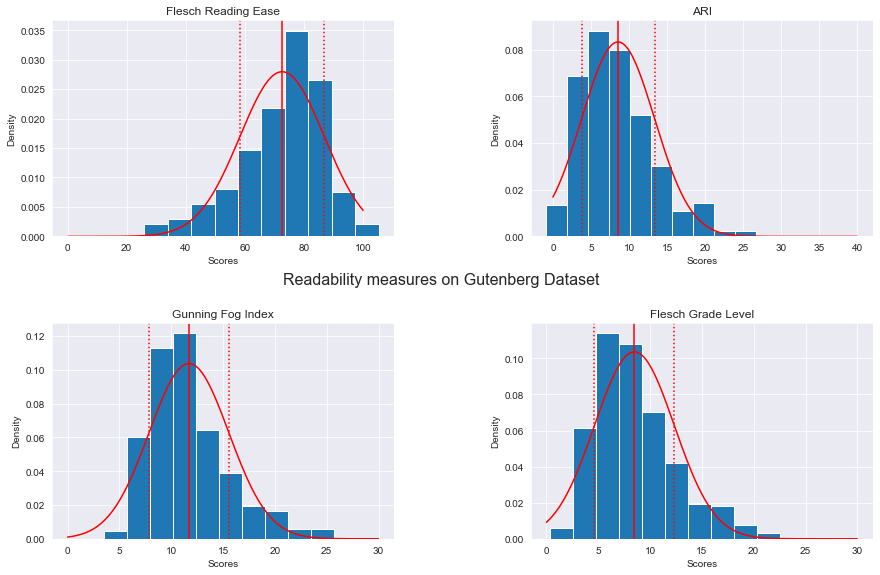

In [12]:
#Fitting all metrics to Gaussian
FRE = dataframe['Flesch Reading Ease']
meanFRE, varFRE  = scp.stats.distributions.norm.fit(FRE)
xFRE = np.linspace(0,100,200)
fitted_FRE = scp.stats.distributions.norm.pdf(xFRE, meanFRE, varFRE)

ARI = dataframe['ARI']
meanARI, varARI  = scp.stats.distributions.norm.fit(ARI)
xARI = np.linspace(0,40,200)
fitted_ARI = scp.stats.distributions.norm.pdf(xARI, meanARI, varARI)

GFI = dataframe['Gunning Fog Index']
meanGFI, varGFI  = scp.stats.distributions.norm.fit(GFI)
xGFI = np.linspace(0,30,200)
fitted_GFI = scp.stats.distributions.norm.pdf(xGFI, meanGFI, varGFI)

FGL = dataframe['Flesch Grade Level']
meanFGL, varFGL  = scp.stats.distributions.norm.fit(FGL)
xFGL = np.linspace(0,30,200)
fitted_FGL = scp.stats.distributions.norm.pdf(xFGL, meanFGL, varFGL)

#Plotting
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(FRE, density =True )
axs[0, 0].set_title('Flesch Reading Ease')
axs[0, 0].plot(xFRE,fitted_FRE,'r-')
axs[0, 0].axvline(meanFRE,color='r',label='Average')
axs[0, 0].axvline(meanFRE-varFRE,color='r',label='1st quartile',linestyle='dotted')
axs[0, 0].axvline(meanFRE+varFRE,color='r',label='3rd quartile',linestyle='dotted')

axs[0, 1].hist(ARI, density =True )
axs[0, 1].set_title('ARI')
axs[0, 1].plot(xARI,fitted_ARI,'r-')
axs[0, 1].axvline(meanARI,color='r',label='Average')
axs[0, 1].axvline(meanARI-varARI,color='r',label='1st quartile',linestyle='dotted')
axs[0, 1].axvline(meanARI+varARI,color='r',label='3rd quartile',linestyle='dotted')

axs[1, 0].hist(GFI, density =True )
axs[1, 0].set_title('Gunning Fog Index')
axs[1, 0].plot(xGFI,fitted_GFI,'r-')
axs[1, 0].axvline(meanGFI,color='r',label='Average')
axs[1, 0].axvline(meanGFI-varGFI,color='r',label='1st quartile',linestyle='dotted')
axs[1, 0].axvline(meanGFI+varGFI,color='r',label='3rd quartile',linestyle='dotted')

axs[1, 1].hist(FGL, density =True )
axs[1, 1].set_title('Flesch Grade Level')
axs[1, 1].plot(xFGL,fitted_FGL,'r-')
axs[1, 1].axvline(meanFGL,color='r',label='Average')
axs[1, 1].axvline(meanFGL-varFGL,color='r',label='1st quartile',linestyle='dotted')
axs[1, 1].axvline(meanFGL+varFGL,color='r',label='3rd quartile',linestyle='dotted')

for ax in axs.flat:
    ax.set(xlabel='Scores', ylabel='Density')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.0, 
                    right=2, 
                    top=1.8, 
                    wspace=0.4, 
                    hspace=0.4)

fig.suptitle("Readability measures on Gutenberg Dataset",x=1,y=0.9, ha="center",va="center",fontsize=16)

plt.show()

In [13]:
 #Copy specific columns from dataframe
 new = dataframe[['ARI','Gunning Fog Index','Flesch Reading Ease','Flesch Grade Level']].copy()

In [14]:
print(new.mean())
# new.mean().to_csv('100pbp_nr_mean.csv')

ARI                     8.560242
Gunning Fog Index      11.709088
Flesch Reading Ease    72.568524
Flesch Grade Level      8.488143
dtype: float64


In [15]:
print(new.std())
# new.std().to_csv('100pbp_nr_std.csv')

ARI                     4.794345
Gunning Fog Index       3.850544
Flesch Reading Ease    14.297337
Flesch Grade Level      3.856510
dtype: float64


In [16]:
print(dataframe.quantile())

Unnamed: 0             149.500000
ARI                      7.756096
Gunning Fog Index       10.966507
Flesch Reading Ease     75.726072
Flesch Grade Level       7.798918
Name: 0.5, dtype: float64


In [17]:
print(dataframe.quantile(0.25))

Unnamed: 0             74.750000
ARI                     4.952523
Gunning Fog Index       8.807202
Flesch Reading Ease    64.608666
Flesch Grade Level      5.601792
Name: 0.25, dtype: float64


In [18]:
print(dataframe.quantile(0.75))

Unnamed: 0             224.250000
ARI                     11.150253
Gunning Fog Index       13.376496
Flesch Reading Ease     82.664776
Flesch Grade Level      10.272849
Name: 0.75, dtype: float64


Sort the data by their score to split equally

In [22]:
sorted_df = dataframe.sort_values(by=['Flesch Reading Ease'])

In [23]:
slice1 = sorted_df[:100]
slice2 = sorted_df[100:200]
slice3 = sorted_df[200:]

In [24]:
slice1

,Unnamed: 0,Title,Text,ARI,Gunning Fog Index,Flesch Reading Ease,Flesch Grade Level
18,18,George Washington___State of the Union Address...,\nState of the Union Address\nGeorge Washingto...,20.090390,21.825656,25.958997,18.608137
30,30,Henry James___A Small Boy and Others.txt,\n\n[Illustration: Henry James and his Father\...,24.968588,24.931312,27.772812,21.506747
142,142,James Russell Lowell___Abraham Lincoln.txt,\nAbraham Lincoln\nby James Russell LowellTHER...,20.980265,22.152980,31.920450,18.654775
225,225,Thomas Henry Huxley___The Interpreters of Gene...,Our fabulist warns those who in quarrels inter...,20.653046,22.563055,33.270518,18.721247
289,289,Herbert George Wells___Anticipations.txt,It is proposed in this book to present in as o...,19.231887,21.122470,33.344674,17.623120
...,...,...,...,...,...,...,...
246,246,William Henry Hudson___A Crystal Age.txt,"I do not quite know how it happened, my recoll...",10.748696,13.626409,68.617526,10.129890
187,187,R M Ballantyne___Martin Rattler.txt,Martin Rattler was a very bad boy. At least hi...,9.805547,12.559424,69.126336,9.473022
226,226,John Dryden___The Poetical Works of John Dryde...,"With Life, Critical Dissertation, and\n Expla...",14.432074,15.179531,69.319685,11.715781
211,211,Robert Louis Stevenson___The Sea Fogs.txt,With an Introduction by Thomas Rutherford Baco...,9.725079,11.738089,69.619667,9.430530


In [25]:
slice2

,Unnamed: 0,Title,Text,ARI,Gunning Fog Index,Flesch Reading Ease,Flesch Grade Level
35,35,Ralph Waldo Emerson___Poems.txt,In Mr. Cabot's prefatory note to the Riverside...,12.613985,13.288604,69.670412,10.739170
69,69,Benjamin Disraeli___Tancred.txt,IN THAT part of the celebrated parish of St. G...,8.135352,11.163291,69.946683,8.458774
144,144,Lewis Carroll___The Hunting of the Snark.txt,THE HUNTING OF THE SNARK\n an Agony in Eight ...,11.147216,13.248797,69.977403,10.103239
255,255,"Bret Harte___Susy, A Story of the Plains.txt",Where the San Leandro turnpike stretches its d...,7.970831,11.368328,70.161779,8.049219
272,272,R M Ballantyne___The Walrus Hunters.txt,"\nThe Walrus Hunters, by R.M. Ballantyne (1825...",9.386368,12.559725,70.162477,9.255099
...,...,...,...,...,...,...,...
135,135,Herbert George Wells___The Research Magnificen...,The story of William Porphyry Benham is the st...,4.998103,9.129124,79.397171,5.806594
9,9,Charles Kingsley___Phaethon.txt,Templeton and I were lounging by the clear lim...,5.906061,10.160022,79.404662,6.662036
88,88,Wilkie Collins___The Law and the Lady.txt,"IN offering this book to you, I have no Prefac...",4.202080,8.860088,79.469472,5.552717
279,279,Charlotte Bronte___Jane Eyre.txt,A preface to the first edition of Jane Eyre be...,5.996528,9.978050,79.587452,6.561185


In [26]:
slice3

,Unnamed: 0,Title,Text,ARI,Gunning Fog Index,Flesch Reading Ease,Flesch Grade Level
137,137,George Alfred Henty___Facing Death.txt,Author of With Clive in India; In Freedom's C...,7.328376,10.715400,79.980434,7.328574
290,290,"Henry James___The Bostonians, Volume 1.txt",Olive will come down in about ten minutes; she...,5.918674,10.144306,80.121028,6.417304
221,221,William Dean Howells___A Pair of Patient Lover...,Author of The Landlord at Lion's Head Ragged L...,6.930755,11.107570,80.168237,7.234397
159,159,Edward Phillips Oppenheim___The Yellow Crayon.txt,"It was late summer-time, and the perfume of fl...",3.296791,7.637402,80.176995,4.608069
286,286,Jack London___The Scarlet Plague.txt,THE way led along upon what had once been the ...,5.236085,8.665887,80.357664,5.737384
...,...,...,...,...,...,...,...
6,6,"William Wymark Jacobs___Keeping Watch, Night W...","Human natur'! said the night-watchman, gazing ...",1.700927,6.583856,98.283280,2.968975
13,13,William Somerset Maugham___Liza of Lambeth.txt,Published by the Penguin Group\n\n First publ...,1.509158,6.819155,98.760395,2.811115
117,117,George Bernard Shaw___O'Flaherty V. C.txt,It may surprise some people to learn that in 1...,0.479531,6.370902,99.945913,2.227807
239,239,John Galsworthy___The First and The Last.txt,\n\nA Drama In Three Scenes\n\nFrom Six Short ...,-0.701841,3.555495,102.255428,0.564100
